In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime,timedelta

In [2]:
stock_names=['SPY','META','GOOGL','MSFT']
end_date=datetime.today()
n_years=5
start_date=end_date-timedelta(days=n_years*365)

stock_data=yf.download(tickers=stock_names,start=start_date,end=end_date)
stock_prices=stock_data['Adj Close']

df=pd.concat([stock_prices['SPY'],
             stock_prices['META'],
             stock_prices['GOOGL'],
             stock_prices['MSFT']],axis=1)

[*********************100%***********************]  4 of 4 completed


In [3]:
df

,SPY,META,GOOGL,MSFT
Date,,,,
2018-07-19,257.324310,208.089996,59.955002,98.741302
2018-07-20,257.030273,209.940002,59.894001,100.509926
2018-07-23,257.508148,210.910004,60.549999,102.117790
2018-07-24,258.803894,214.669998,62.907501,101.824600
2018-07-25,261.009552,217.500000,63.797001,104.822762
...,...,...,...,...
2023-07-11,442.459991,298.290009,117.139999,332.470001
2023-07-12,446.019989,309.339996,118.930000,337.200012
2023-07-13,449.559998,313.410004,124.540001,342.660004


In [4]:
stock_returns=df.pct_change()
stock_returns

,SPY,META,GOOGL,MSFT
Date,,,,
2018-07-19,NaN,NaN,NaN,NaN
2018-07-20,-0.001143,0.008890,-0.001017,0.017912
2018-07-23,0.001859,0.004620,0.010953,0.015997
2018-07-24,0.005032,0.017827,0.038935,-0.002871
2018-07-25,0.008523,0.013183,0.014140,0.029444
...,...,...,...,...
2023-07-11,0.006369,0.014247,0.005925,0.001929
2023-07-12,0.008046,0.037044,0.015281,0.014227
2023-07-13,0.007937,0.013157,0.047171,0.016192


In [5]:
stock_log_returns=np.log(df/df.shift(1))
average_log_return=stock_log_returns.mean(1)

In [6]:
stock_log_returns

,SPY,META,GOOGL,MSFT
Date,,,,
2018-07-19,NaN,NaN,NaN,NaN
2018-07-20,-0.001143,0.008851,-0.001018,0.017753
2018-07-23,0.001857,0.004610,0.010893,0.015870
2018-07-24,0.005019,0.017670,0.038196,-0.002875
2018-07-25,0.008486,0.013097,0.014041,0.029019
...,...,...,...,...
2023-07-11,0.006348,0.014146,0.005908,0.001927
2023-07-12,0.008014,0.036375,0.015165,0.014127
2023-07-13,0.007906,0.013071,0.046092,0.016062


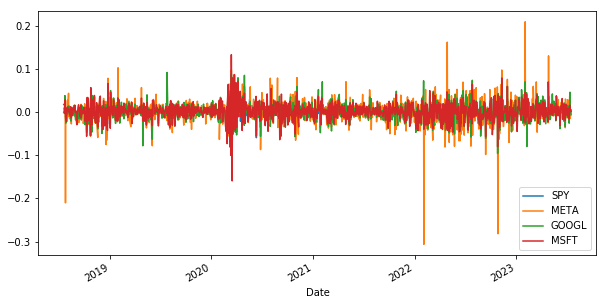

In [7]:
stock_log_returns.plot(figsize=(10,5))

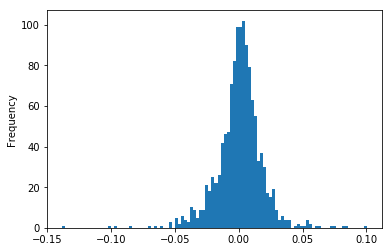

In [8]:
average_log_return.plot.hist(bins=100)

In [9]:
stock_log_returns

,SPY,META,GOOGL,MSFT
Date,,,,
2018-07-19,NaN,NaN,NaN,NaN
2018-07-20,-0.001143,0.008851,-0.001018,0.017753
2018-07-23,0.001857,0.004610,0.010893,0.015870
2018-07-24,0.005019,0.017670,0.038196,-0.002875
2018-07-25,0.008486,0.013097,0.014041,0.029019
...,...,...,...,...
2023-07-11,0.006348,0.014146,0.005908,0.001927
2023-07-12,0.008014,0.036375,0.015165,0.014127
2023-07-13,0.007906,0.013071,0.046092,0.016062


In [10]:
weights=stock_log_returns.sub(average_log_return,axis=0)*-1.0
absolute_weights=weights.abs()
absolute_weights_sum=np.sum(absolute_weights,axis=1)
adjusted_weights=weights.div(absolute_weights_sum,axis=0).dropna()#weights/absolute_weights_sum

In [11]:
adjusted_weights.head(3)#- values are shots sell

,SPY,META,GOOGL,MSFT
Date,,,,
2018-07-20,0.252179,-0.095266,0.247821,-0.404734
2018-07-23,0.317801,0.182199,-0.127383,-0.372617
2018-07-24,0.176525,-0.058967,-0.441033,0.323475


In [12]:
ptf_daily_returns=(adjusted_weights.shift(1)*stock_returns).dropna()

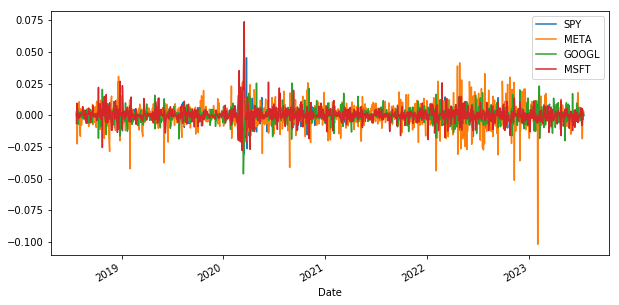

In [13]:
ptf_daily_returns.plot(figsize=(10,5))

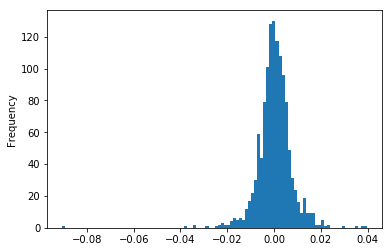

In [14]:
daily_strategy_returns=np.sum(ptf_daily_returns,axis=1)
daily_strategy_returns.plot.hist(bins=100)

In [15]:
np.mean(daily_strategy_returns),daily_strategy_returns.std()

(0.00024394311117610832, 0.007456048882319016)

In [16]:
np.mean(daily_strategy_returns)/daily_strategy_returns.std()

0.032717477450367245

In [17]:
stock_returns.mean(1).mean(),stock_returns.mean(1).std()

(0.0008113303788413604, 0.018005667006953902)

In [18]:
stock_returns.mean(1).mean()/stock_returns.mean(1).std()

0.04505972361523844

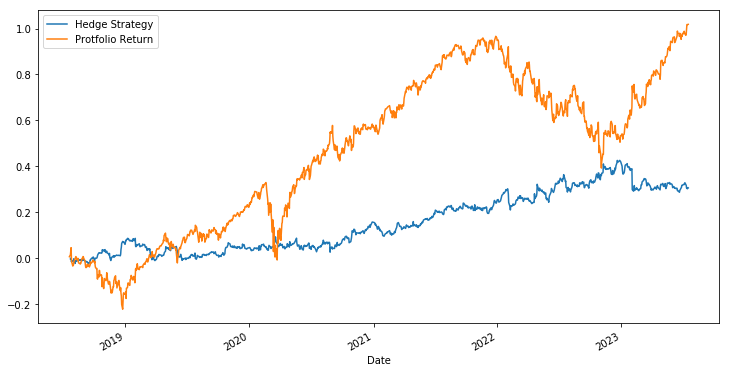

In [19]:
daily_strategy_returns.cumsum().plot(figsize=(12.2,6.4),label='Hedge Strategy',legend=True)
stock_returns.mean(1).cumsum().plot(figsize=(12.2,6.4),label='Protfolio Return',legend=True)